In [250]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import warnings

# EDA on Iris Dataset

## Dataset Overview

In [251]:
df = pd.read_csv("Iris.csv") 

# Printing top 5 rows 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [252]:
#make the Id column as index
df = pd.read_csv('Iris.csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [253]:
#calculate median of each species
x = df.groupby('Species').median()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [254]:
#Statistics of this dataset
stats = df.describe()
stats

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [255]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,5.843333,3.054,3.758667,1.198667
range,3.600000,2.400,5.900000,2.400000
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000


In [256]:
df.shape

(150, 5)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Checking Missing Values

In [258]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking Duplicates

In [259]:
#Checking Duplicates
data = df.drop_duplicates(subset ="Species") 
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
51,7.0,3.2,4.7,1.4,Iris-versicolor
101,6.3,3.3,6.0,2.5,Iris-virginica


In [260]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Aggregation functions

In [261]:
#Calculate mean and median or others using multiple functions at once - 2 methods

df.groupby('Species').agg(['mean', 'median'])  # passing a list of recognized strings
df.groupby('Species').agg([np.mean, np.median]) 

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

In [262]:
#If we want an explicit aggr function like max for a column
agg_dict={field: ['mean', 'median'] for  field in df.columns.tolist() if field != 'Species'}
agg_dict['PetalLengthCm'] = 'max'
df.groupby('Species').agg(agg_dict)

SepalLengthCm        SepalWidthCm        PetalLengthCm  \
                         mean median         mean median           max   
Species                                                                  
Iris-setosa             5.006    5.0        3.418    3.4           1.9   
Iris-versicolor         5.936    5.9        2.770    2.8           5.1   
Iris-virginica          6.588    6.5        2.974    3.0           6.9   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

## Data Visualization

### Distribution Plot

Text(0.5, 1.0, 'Distribution of petal-width')

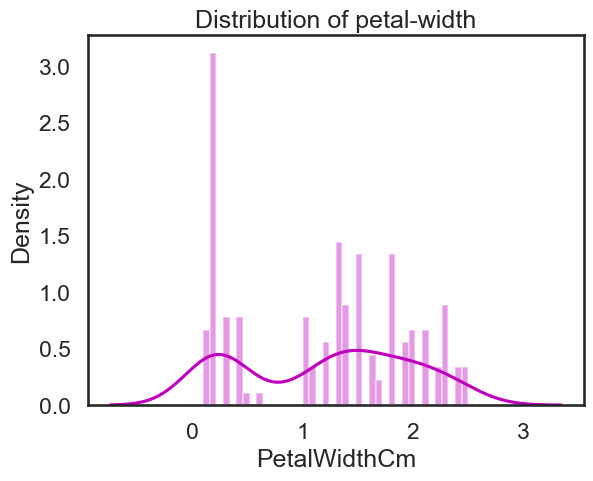

In [263]:
sns.distplot(a=df['PetalWidthCm'], bins=40, color='m')
plt.title('Distribution of petal-width')

## Count Plot

<Axes: xlabel='Species', ylabel='count'>

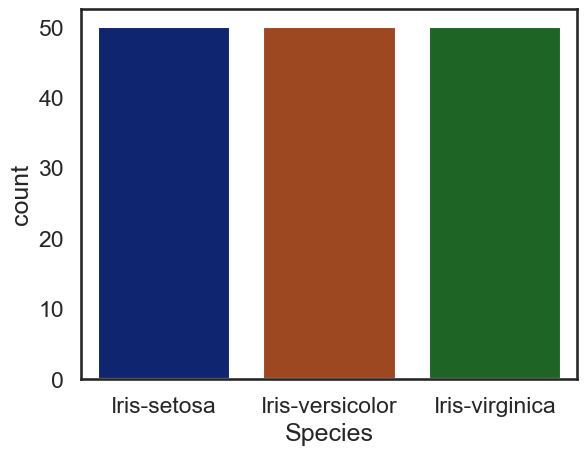

In [264]:
sns.countplot(x='Species',data=df)

### Box Plot

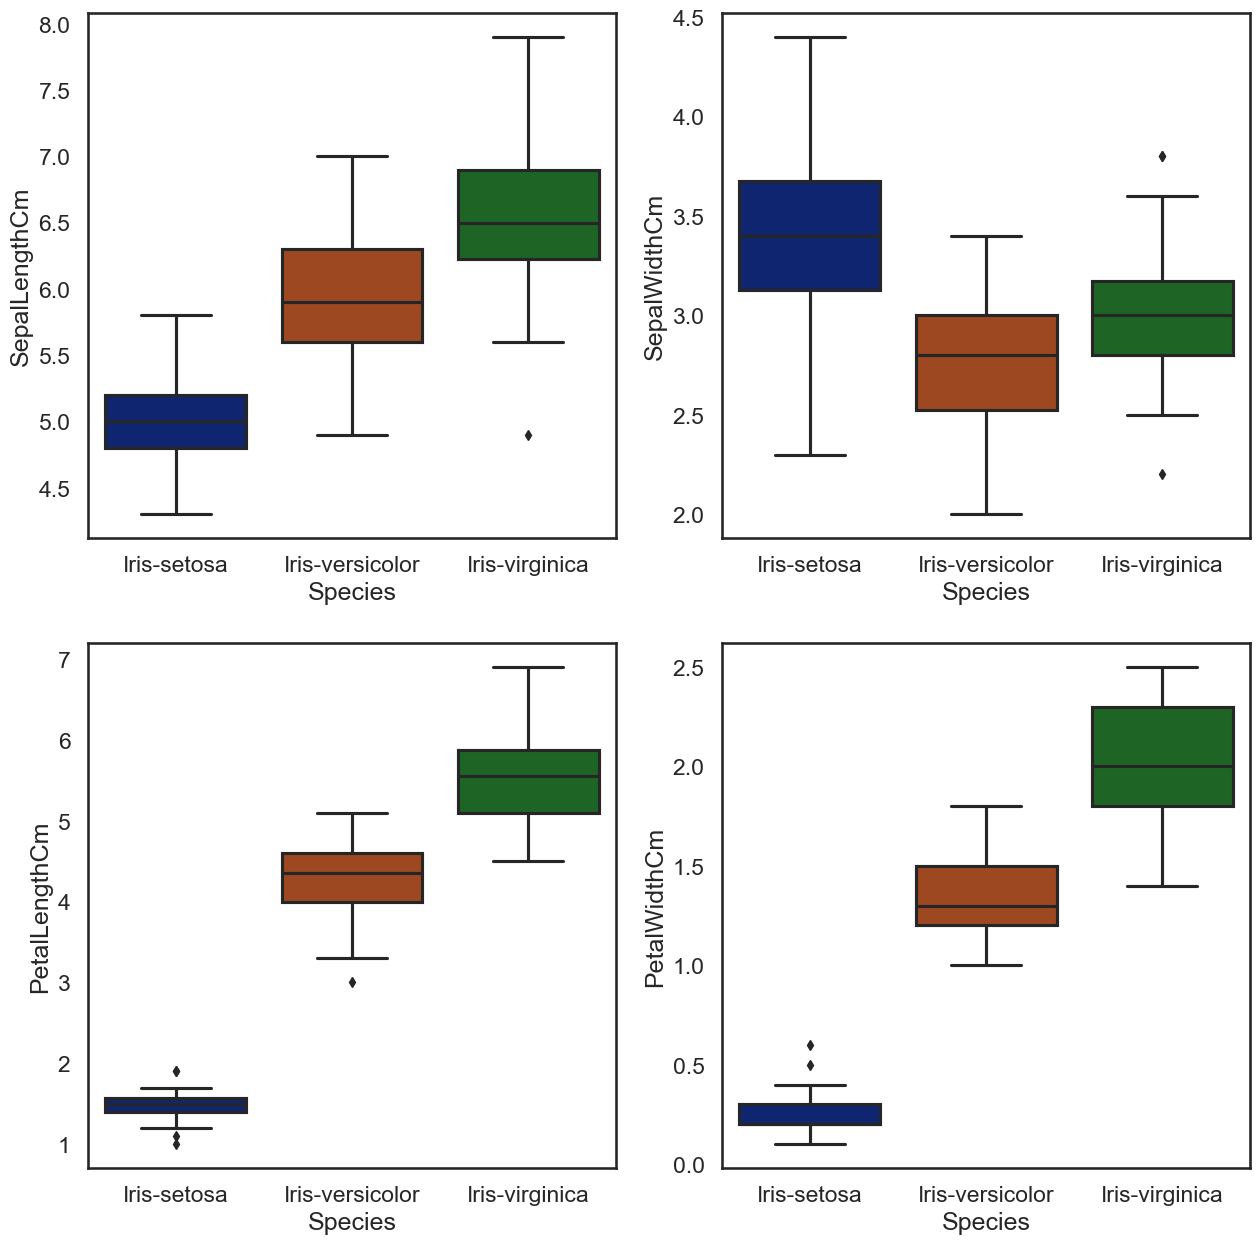

In [270]:
def graph(y): 
    sns.boxplot(x="Species", y=y, data=df) 
  
plt.figure(figsize=(15,15)) 
      
# Adding the subplot at the specified 
# grid position 
plt.subplot(221) 
graph('SepalLengthCm') 
  
plt.subplot(222) 
graph('SepalWidthCm') 
  
plt.subplot(223) 
graph('PetalLengthCm') 
  
plt.subplot(224) 
graph('PetalWidthCm') 
  
plt.show()

### Violin Plot

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

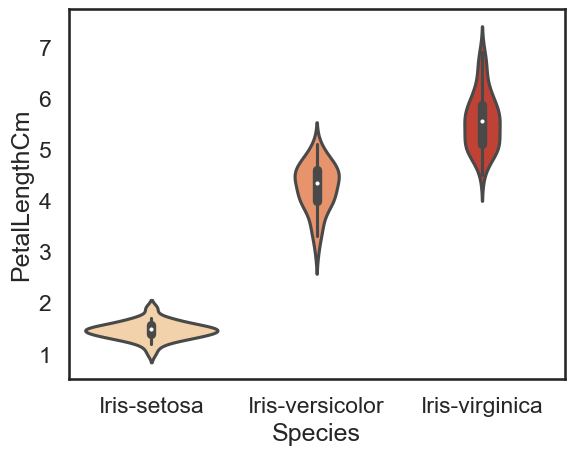

In [271]:
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette='OrRd')

### Heatmap

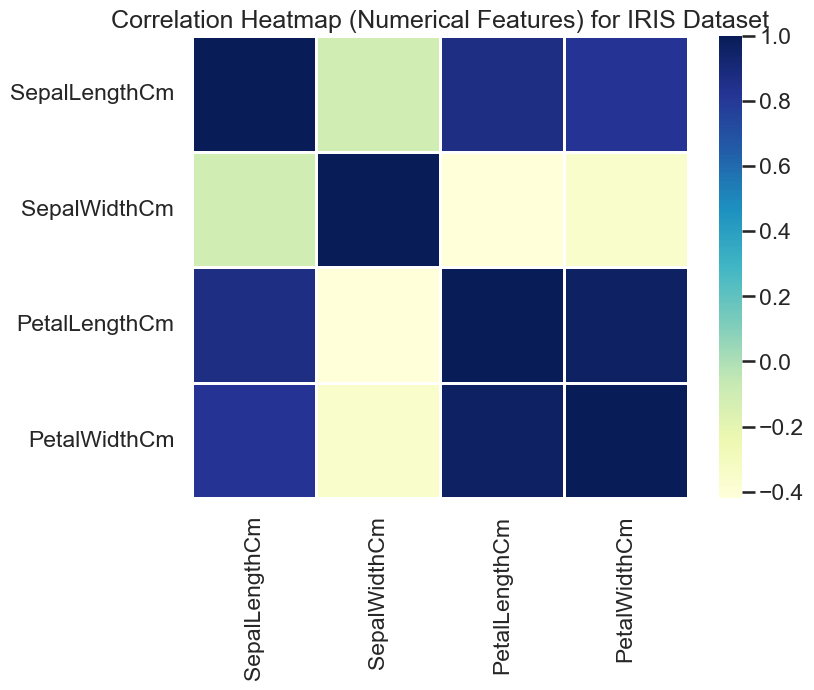

In [272]:
# Encode species names into numerical labels
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(species_mapping)

# Compute the correlation matrix for numerical features only
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
corr_matrix = df[numerical_features].corr()

# Create the heatmap without species row and column
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="YlGnBu", linecolor='white', linewidths=1)
plt.title("Correlation Heatmap (Numerical Features) for IRIS Dataset")
plt.show()

### Cluster Plot

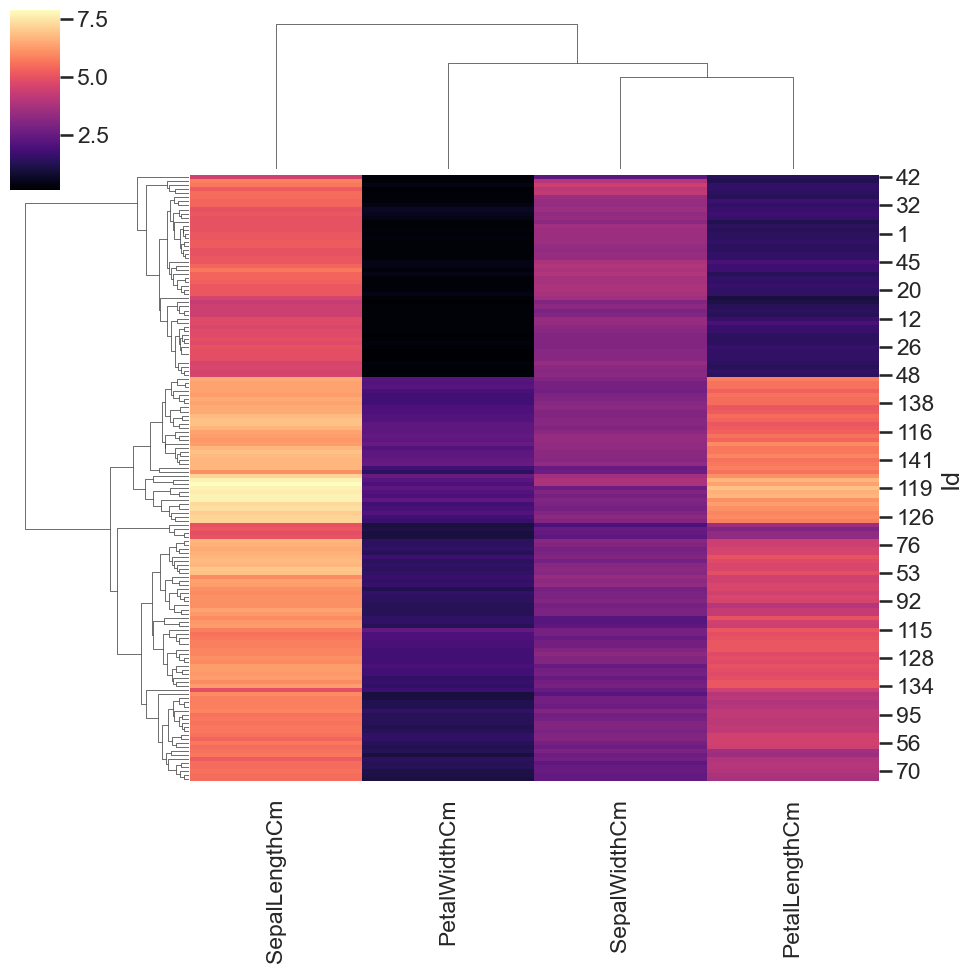

In [273]:
#Cluster map takes only quantitative variables, so we need to do some processing here.
x = df.drop('Species',axis=1)
g = sns.clustermap(x, cmap="magma")

### Regression Plot

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

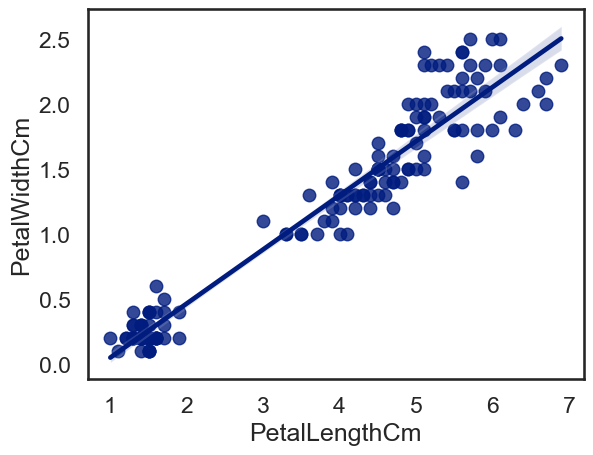

In [274]:
sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=df)

### LM Plot

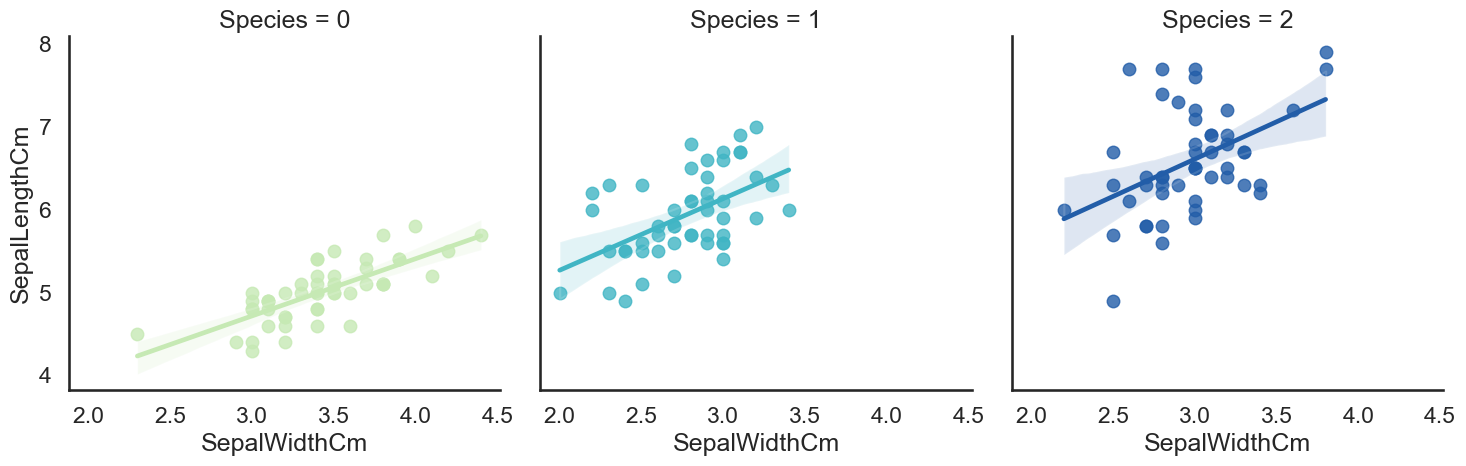

In [275]:
sns.lmplot(x = 'SepalWidthCm', y = 'SepalLengthCm', data = df, col = 'Species', hue = 'Species', palette = 'YlGnBu')

### Joint Plot

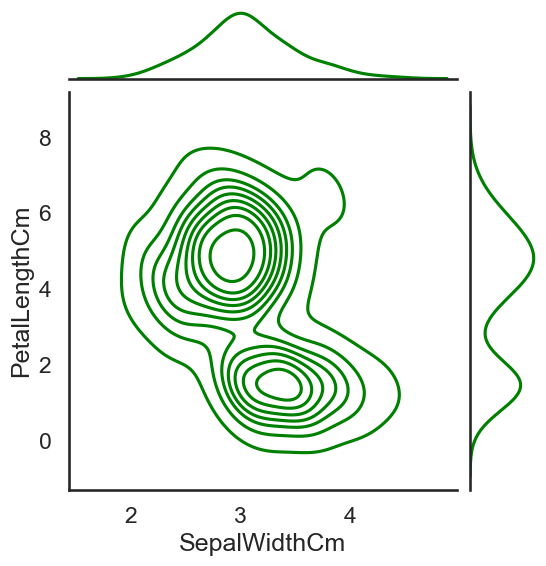

In [276]:
sns.jointplot(x="SepalWidthCm", y="PetalLengthCm", data=df, kind="kde", color="g")

### Scatter Plot

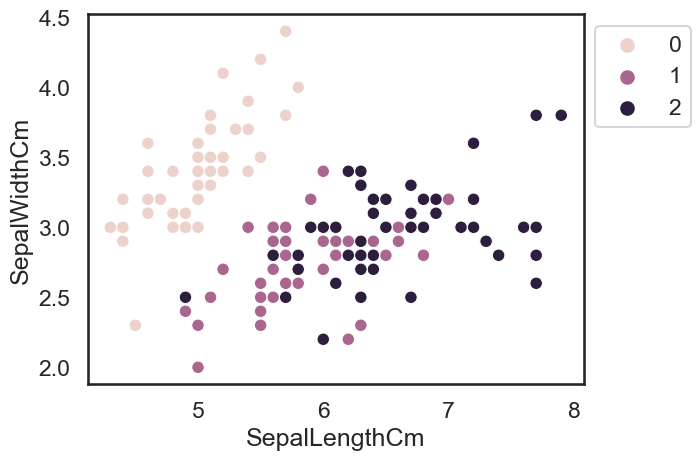

In [277]:
# Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', 
                hue='Species', data=df) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

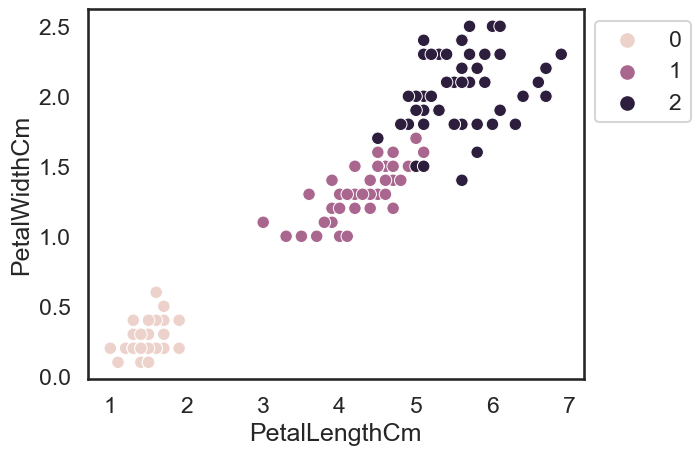

In [278]:
# Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', 
                hue='Species', data=df) 
  
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

### Histogram

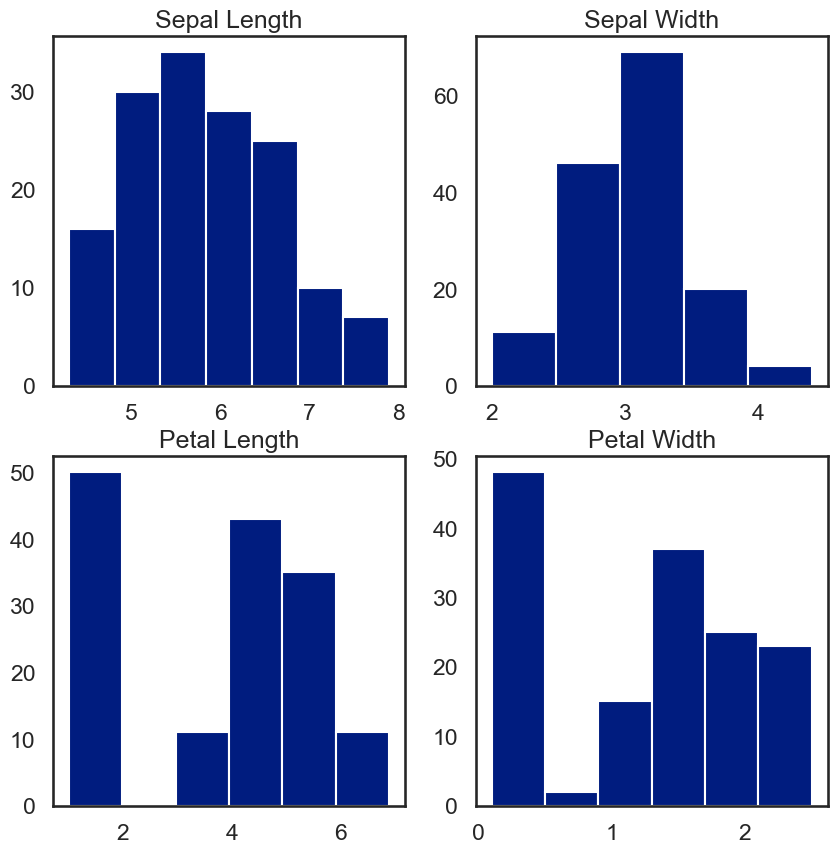

In [279]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(df['SepalLengthCm'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(df['SepalWidthCm'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(df['PetalLengthCm'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(df['PetalWidthCm'], bins=6);


### Plotting all histograms

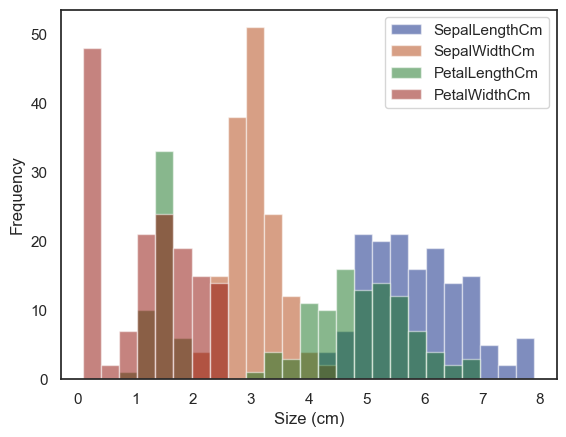

In [280]:
df = pd.read_csv('Iris.csv', index_col='Id')

sns.set_context('notebook')

ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

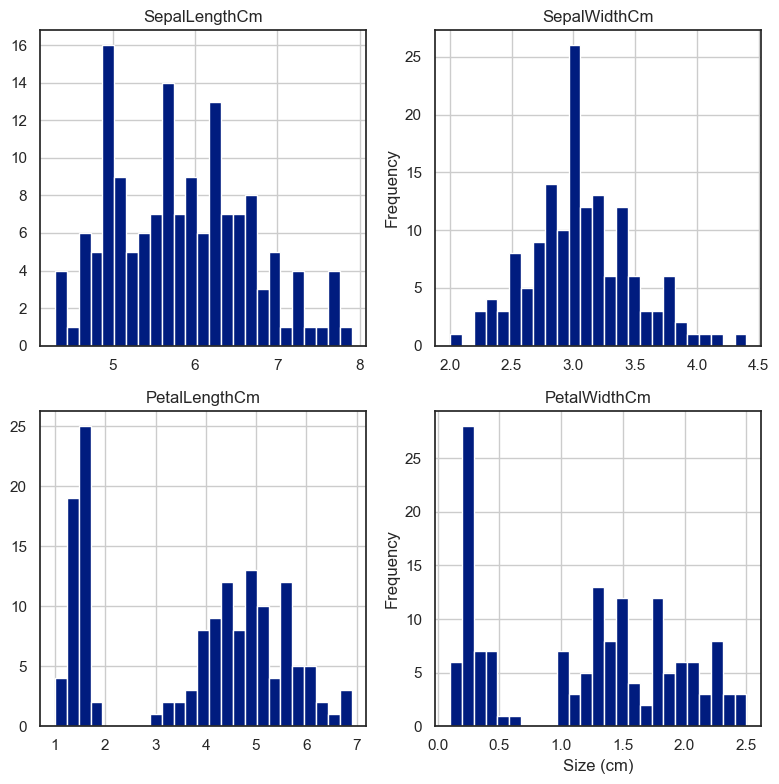

In [203]:
# Assuming df is your DataFrame and you want to plot histograms
axList = df.drop(columns=['Species']).hist(bins=25, figsize=(8, 8))  # Exclude 'Species' column

# Add x-label to the last row of subplots
for i, ax in enumerate(axList.flatten()):
    if i == 0:
        continue  # Skip the first subplot which corresponds to 'Species'

    # Calculate row and column indices
    row_index = (i - 1) // axList.shape[1]  # Adjust index for skipping first subplot
    col_index = (i - 1) % axList.shape[1]

    # Check if the current Axes object is in the last row
    if row_index == axList.shape[0] - 1:
        ax.set_xlabel('Size (cm)')
        
    # Check if the current Axes object is in the first column
    if col_index == 0:
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### All features in single boxplot

In [281]:
# First we have to reshape the data so there is 
# only a single measurement in each column
df = pd.read_csv('Iris.csv', index_col='Id')

plot_data = (df
             .set_index('Species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,Species,measurement,size
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalWidthCm,3.5
2,Iris-setosa,PetalLengthCm,1.4
3,Iris-setosa,PetalWidthCm,0.2
4,Iris-setosa,SepalLengthCm,4.9


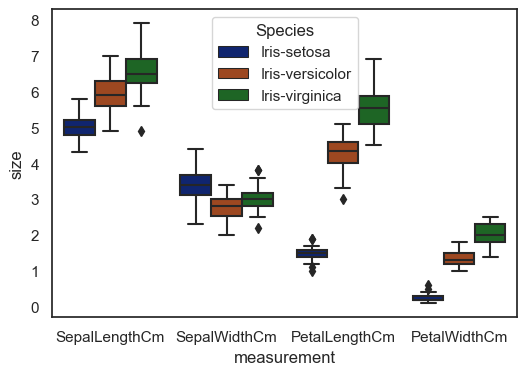

In [282]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='Species', data=plot_data);

### Pair Plot

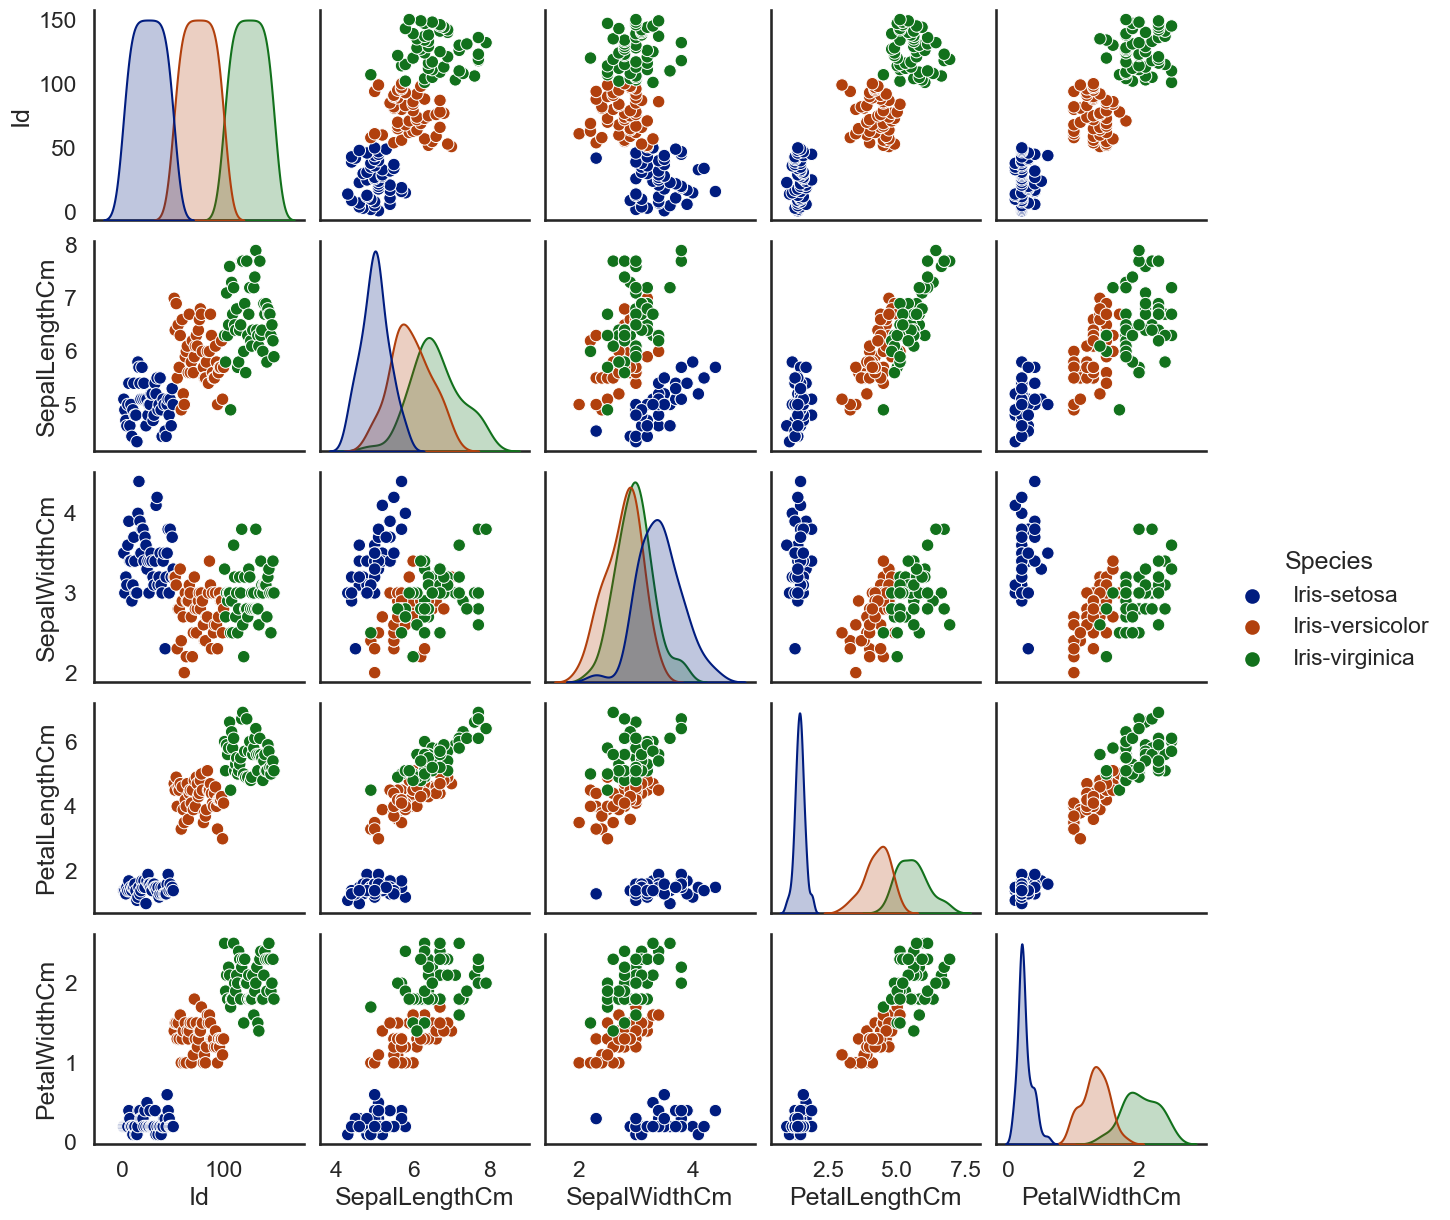

In [283]:
df = pd.read_csv('Iris.csv') 
sns.set_context('talk')
sns.pairplot(df, hue='Species');

### Histograms with Distplot Plot

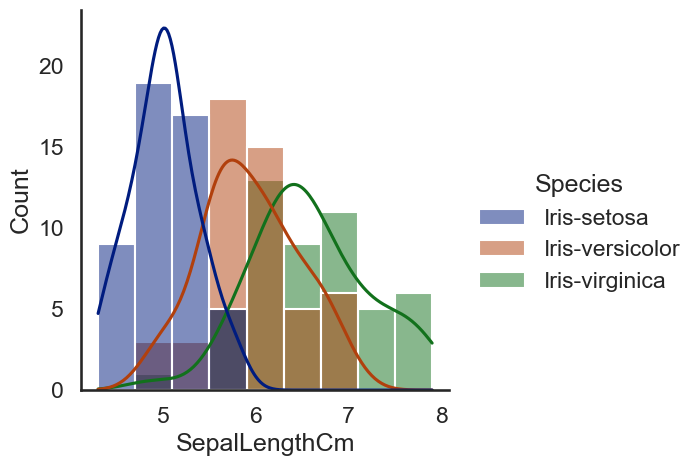

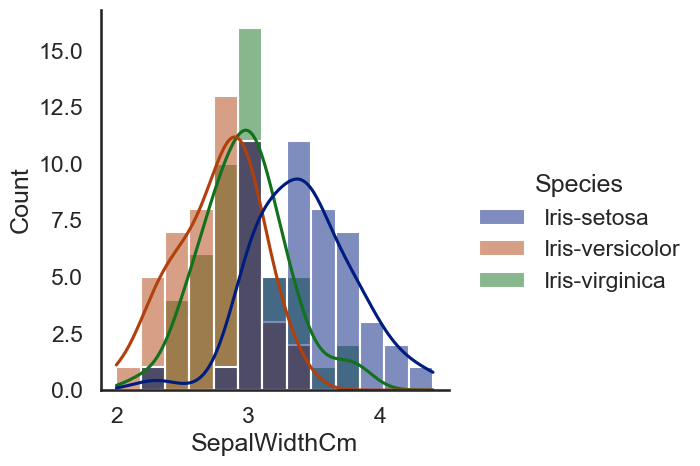

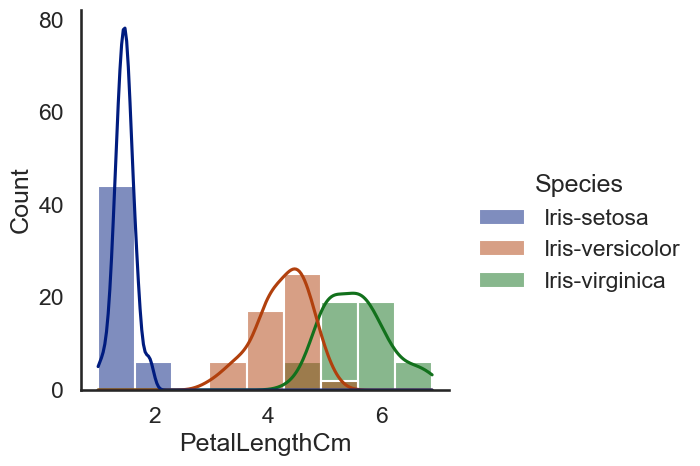

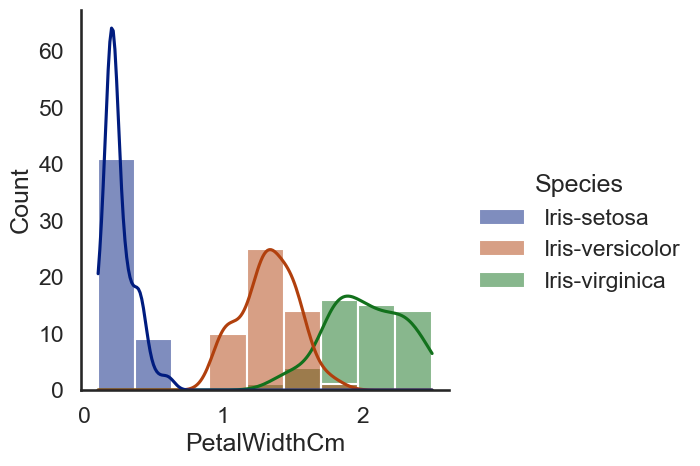

In [284]:
df = pd.read_csv('Iris.csv') 

sns.displot(data=df, x="SepalLengthCm", hue="Species", kde=True)
sns.displot(data=df, x="SepalWidthCm", hue="Species", kde=True)
sns.displot(data=df, x="PetalLengthCm", hue="Species", kde=True)
sns.displot(data=df, x="PetalWidthCm", hue="Species", kde=True)

plt.show()

### Handling Correlation

In [285]:
df = pd.read_csv('Iris.csv') 
numeric_columns = df.select_dtypes(include=['float64'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


### Handling Outliers

<Axes: xlabel='SepalWidthCm'>

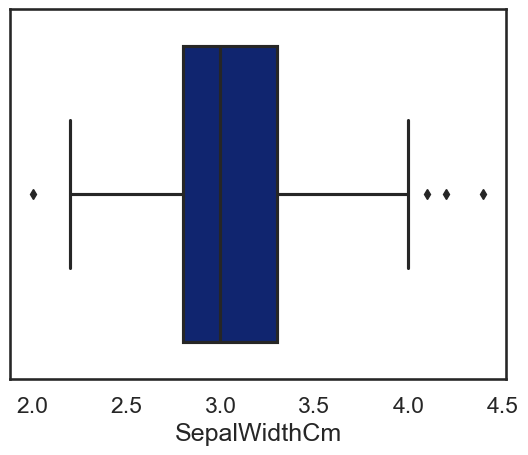

In [209]:
df = pd.read_csv('Iris.csv') 

sns.boxplot(x='SepalWidthCm', data=df)

### Removing Outliers

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

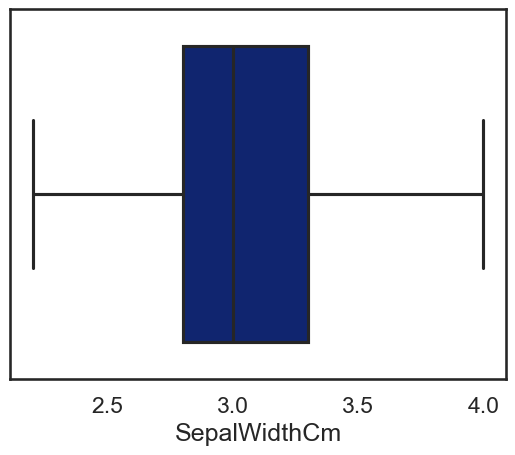

In [286]:
df = pd.read_csv('Iris.csv') 

# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
                interpolation = 'midpoint') 
  
Q3 = np.percentile(df['SepalWidthCm'], 75, 
                interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 
  
# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 
  
# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
  
print("New Shape: ", df.shape) 
  
sns.boxplot(x='SepalWidthCm', data=df)


# Train-Test Analysis

In [213]:
data = df.copy()
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [215]:
from sklearn.model_selection import train_test_split

target = 'Species'
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# it shows 80% of data is split for training and 20% of the data goes to testing.
print(X_train.shape)
print(X_test.shape)

(116, 4)
(30, 4)


In [232]:
from sklearn import datasets 
from sklearn.cluster import KMeans
#load the data
iris = datasets.load_iris()

print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [233]:
#Iris data Ground Truth result
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [234]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

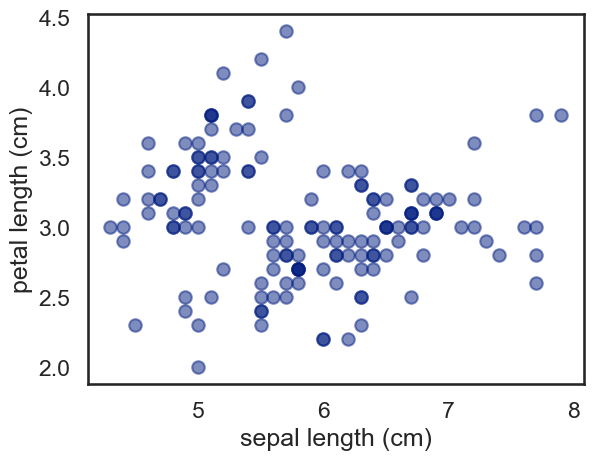

In [235]:
samples = iris.data
x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

# Supervised Analysis

## Logistic Regression

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 90.0 %


## Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Test Accuracy for Random Forest:', metrics.accuracy_score(y_test, y_pred_rf) * 100, '%')

Test Accuracy for Random Forest: 86.66666666666667 %


## Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Test Accuracy for Decision Tree:', metrics.accuracy_score(y_test, y_pred_dt) * 100, '%')

Test Accuracy for Decision Tree: 86.66666666666667 %


## Support Vector Machines (SVM):

In [221]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Test Accuracy for SVM:', metrics.accuracy_score(y_test, y_pred_svm) * 100, '%')

Test Accuracy for SVM: 96.66666666666667 %


## Unsupervised analysis

## K-means clustering

In [249]:
from sklearn.cluster import KMeans
k=3
model = KMeans(n_clusters = k)

In [238]:
#use .fit() method to fit the model to the samples
model.fit(samples)

KMeans(n_clusters=3)

In [239]:
# Use .predict() to determine the labels of samples 
labels = model.predict(samples)
# Print the labels
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## KNN (k-nearest neighbors) 

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Test Accuracy for KNN:', metrics.accuracy_score(y_test, y_pred_knn) * 100, '%')

Test Accuracy for KNN: 90.0 %
